In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import musicalrobot

In [2]:
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa

In [3]:
frames = ed.input_file('../musicalrobot/data/8_15_19_Dodecanoic_acid.tiff')

In [4]:
len(frames)

743

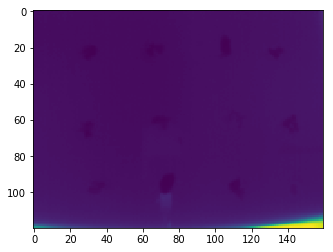

In [5]:
plt.imshow(frames[0])

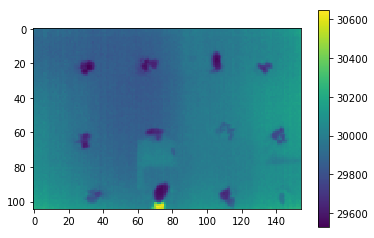

In [6]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[0:105,0:155])
plt.imshow(crop_frame[0])
plt.colorbar()

In [7]:
flip_frames, regprops, s_temp, p_temp, inf_temp = ed.inflection_temp(crop_frame,12,3,4)

Text(0.5, 1.0, 'Sample centroid and plate locations at which the temperature profile is monitored')

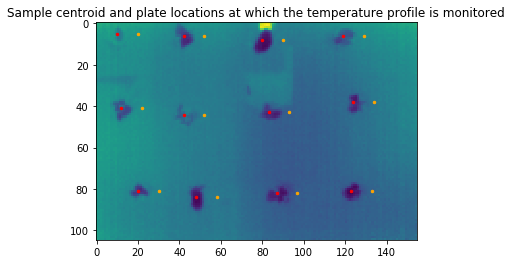

In [8]:
plt.imshow(flip_frames[0])
plt.scatter(regprops[0]['Plate_coord'],regprops[0]['Row'],c='orange',s=6)
plt.scatter(regprops[0]['Column'],regprops[0]['Row'],s=6,c='red')
plt.title('Sample centroid and plate locations at which the temperature profile is monitored')

In [9]:
regprops[0]

,Row,Column,Plate,Plate_coord,Area,Perim,Mean Intensity
2,5.0,10.0,30136.0,20.0,24.0,16.000000,29978.0
5,41.0,12.0,30083.0,22.0,74.0,30.142136,29966.0
9,81.0,20.0,30036.0,30.0,43.0,23.313708,29699.0
1,6.0,42.0,30052.0,52.0,64.0,28.727922,29692.0
6,44.0,42.0,30013.0,52.0,78.0,37.556349,29904.0
10,84.0,48.0,29980.0,58.0,60.0,27.899495,29570.0
0,8.0,80.0,29982.0,90.0,91.0,40.349242,29568.0
7,43.0,83.0,29864.0,93.0,60.0,29.071068,29669.0
11,82.0,87.0,29835.0,97.0,66.0,29.899495,29728.0
3,6.0,119.0,30081.0,129.0,62.0,27.899495,29820.0


In [10]:
inf_temp

[44.59,
 40.19,
 46.97,
 46.27,
 48.92,
 30.23,
 43.48,
 46.2,
 44.5,
 47.33,
 47.51,
 44.94]

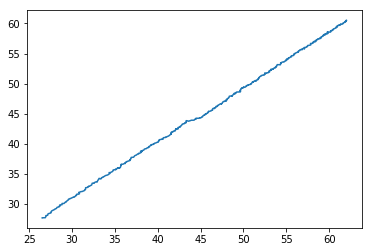

In [12]:
plt.plot(s_temp[5],p_temp[5])

In [ ]:
def inflection_point(s_temp,p_temp):
    s_infl = []
    p_infl = []
    s_peaks = []
    p_peaks = []
    inf_peak = [] ; inf_temp = []
    for temp in s_temp:
        frames = np.linspace(1,len(temp),len(temp))
        # Fitting a spline to the temperature profile of the samples.
        bspl = BSpline(frames,temp,k=3)
        # Stacking x and y to calculate gradient.
        gradient_array = np.column_stack((frames,bspl(frames)))
        # Calculating gradient.
        gradient = np.gradient(gradient_array,axis=0)
        # Calculating derivative
        derivative = gradient[:,1]/gradient[:,0]
        # Finding peaks in the derivative plot.
        peaks, properties = find_peaks(derivative,height=0.1)
        max_height1 = np.max(properties['peak_heights'])
        # To find the second highest peak
        a = list(properties['peak_heights'])
        a.remove(max_height1)
        max_height2 = np.max(a)
        # Appending the index of the two highest peaks to lists.
        inf_index1 = list(properties['peak_heights']).index(max_height1)
        inf_index2 = list(properties['peak_heights']).index(max_height2)
        # Appending the frame number in which these peaks occur to a list
        s_peaks.append([peaks[inf_index1],peaks[inf_index2]])
        # Appending the temperature at the peaks.
        s_infl.append([temp[peaks[inf_index1]],temp[peaks[inf_index2]]])
    for temp in p_temp:
        frames = np.linspace(1,len(temp),len(temp))
        bspl = BSpline(frames,temp,k=3)
        gradient_array = np.column_stack((frames,bspl(frames)))
        gradient = np.gradient(gradient_array,axis=0)
        derivative = gradient[:,1]/gradient[:,0]
        peaks, properties = find_peaks(derivative,height=0.1)
        max_height1 = np.max(properties['peak_heights'])
        # To find the second highest peak
        a = list(properties['peak_heights'])
        a.remove(max_height1)
        max_height2 = np.max(a)
        inf_index1 = list(properties['peak_heights']).index(max_height1)
        inf_index2 = list(properties['peak_heights']).index(max_height2)
        p_peaks.append([peaks[inf_index1],peaks[inf_index2]])
        p_infl.append([temp[peaks[inf_index1]],temp[peaks[inf_index2]]])
    for i,peaks in enumerate(s_peaks):
        for peak in peaks:
            if abs(peak - p_peaks[i][0]) >= 3:
                inf_peak.append(peak)
                break
            else:
                pass
    for i,temp in enumerate(s_temp):
        inf_temp.append(temp[inf_peak[i]])
    return inf_temp, s_peaks, p_peaks